In [1]:
import gym
import random
import numpy as np
from QNNAgent import QNNAgent
from matplotlib import pyplot as plt
import pylab as pl
from IPython import display

Using TensorFlow backend.


In [2]:
env = gym.make('LunarLander-v2')
agent = QNNAgent(env.observation_space.shape[0], 
                env.action_space.n)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                273       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                308       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 90        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 678
Trainable params: 678
Non-trainable params: 0
_________________________________________________________________


/home/a-koneti/virtual-envs/tf-gpu-pip3/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


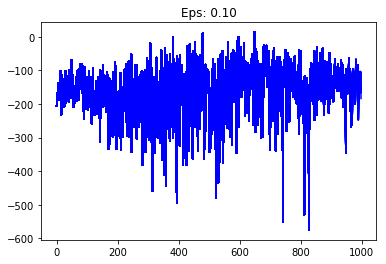

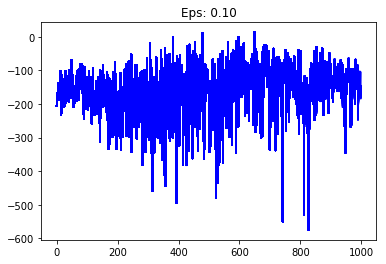

In [3]:
%matplotlib inline
def one_hot(x, max_val = env.action_space.n):
    vec = [0]*max_val
    vec[x] = 1
    return vec

def learning_rate(epoch, decay_rate=0.005):
    max_epsilon = 5e-2
    min_epsilon = 5e-4
    return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epoch)

gamma = 0.99
max_epsilon = 0.99
min_epsilon = 0.1
max_so_far = -999.
decay_rate = 0.007
avg_rewards = []
for epoch in range(1000):
    X = []
    Y = []
    cum_rewards = []
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epoch)
    for i_episode in range(15):
        observation = env.reset()
        cum_reward = 0.
        for t in range(3000):
            # picking e-greedy action
#             env.render()
            action = agent.eps_greedy_action(observation, epsilon=epsilon)
            X_ = list(observation) + one_hot(action)

            #step
            observation, reward, done, info = env.step(action)

            #computing target qValue
            qVal = agent.action_value(observation, action)
            target = reward + gamma*agent.max_action_value(observation)
            cum_reward += reward
            if done:
                break
            X += [X_]
            Y += [target]
        cum_rewards += [cum_reward]
    agent.train(np.array(X),np.array(Y), epochs=10, lr=learning_rate(epoch))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    if np.mean(cum_rewards) > max_so_far:
        max_so_far = np.mean(cum_rewards)
        agent.QNN.Qmodel.save_weights("./max_so_far/val_%d.hdf5"%int(max_so_far))
    avg_rewards += [np.mean(cum_rewards)]
    plt.title("Eps: %.2f"%epsilon)
    plt.plot(avg_rewards, 'b')
env.close()

In [24]:
env = gym.wrappers.Monitor(env, './video/',video_callable=lambda episode_id: True,force = True)

In [25]:
cum_rewards = []
for i_episode in range(5):
    observation = env.reset()
    cum_reward = 0.
    for t in range(1000):
        # picking greedy action
        env.render()
        action = agent.best_action(observation)

        #step
        observation, reward, done, info = env.step(action)
        cum_reward += reward
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

    cum_rewards += [cum_reward]
env.close()
print(np.mean(cum_rewards))


Episode finished after 527 timesteps
Episode finished after 360 timesteps
Episode finished after 353 timesteps
Episode finished after 335 timesteps
Episode finished after 588 timesteps
-126.57584458691636


In [1]:
# for i_episode in range(10):
#     observation = env.reset()
#     for t in range(1000):
#         env.render()
#         action = agent.eps_greedy_action(list(observation), epsilon=0.5)
#         observation, reward, done, info = env.step(action)
#         if done:
#             print("Episode finished after {} timesteps".format(t+1))
#             break
# env.close()